# 3 - Advanced - Explore Repair and Reuse

In [1]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'Tutorial_3')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\TEMP\Tutorial_3


In [2]:
import PV_ICE

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

## REPAIR

In [6]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='Repair_0', 
                  massmodulefile=r'baseline_modules_mass_US.csv', 
                  energymodulefile=r'baseline_modules_energy.csv', )
r1.scenario['Repair_0'].addMaterial('glass', 
                                    massmatfile=r'..\..\baselines\baseline_material_mass_glass.csv', 
                                    energymatfile=r'..\..\baselines\baseline_material_energy_glass.csv')

r1.scenario['Repair_0'].addMaterial('silicon', 
                                    massmatfile=r'..\..\baselines\baseline_material_mass_silicon.csv',
                                    energymatfile=r'..\..\baselines\baseline_material_energy_silicon.csv')
    
r1.createScenario(name='Repair_50', 
                  massmodulefile=r'..\..\baselines\baseline_modules_mass_US.csv', 
                  energymodulefile=r'..\..\baselines\baseline_modules_energy.csv', )
r1.scenario['Repair_50'].addMaterial('glass', 
                                     massmatfile=r'..\..\baselines\baseline_material_mass_glass.csv',
                                     energymatfile=r'..\..\baselines\baseline_material_energy_glass.csv')
r1.scenario['Repair_50'].addMaterial('silicon', 
                                     massmatfile=r'..\..\baselines\baseline_material_mass_silicon.csv', 
                                     energymatfile=r'..\..\baselines\baseline_material_energy_silicon.csv')

path = C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\TEMP\Tutorial_3
Baseline folder directed to default:  C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\baselines


In [7]:
r1.scenario['Repair_0'].dataIn_m['mod_Repair'] = 0
r1.scenario['Repair_50'].dataIn_m['mod_Repair'] = 50

r1.scenario['Repair_0'].dataIn_m['mod_reliability_t50'] = 25
r1.scenario['Repair_0'].dataIn_m['mod_reliability_t90'] = 35
r1.scenario['Repair_50'].dataIn_m['mod_reliability_t50'] = 25
r1.scenario['Repair_50'].dataIn_m['mod_reliability_t90'] = 35

# Setting Project Lifetime beyond Failures
r1.scenario['Repair_0'].dataIn_m['mod_lifetime'] = 50
r1.scenario['Repair_50'].dataIn_m['mod_lifetime'] = 50

In [8]:
r1.calculateMassFlow()
r1.calculateEnergyFlow(insolation=4800) # Modify to European value here. 4800 is for US NSRDB Average.

>>>> Calculating Material Flows <<<<

Working on Scenario:  Repair_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  Repair_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon


>>>> Calculating Energy Flows <<<<

Working on Scenario:  Repair_0
********************
==> Working on Energy for Material :  glass
==> Working on Energy for Material :  silicon
Working on Scenario:  Repair_50
********************
==> Working on Energy for Material :  glass
==> Working on Energy for Material :  silicon


<b> Examples of accessing the dataframes/printing hte keywords: </b>
(we don't have energy now)
* r1.scenario['Repair_0'].dataOut_m.keys()
* r1.scenario['Repair_0'].dataIn_m.keys()
* r1.scenario['Repair_0'].dataOut_e.keys()
* r1.scenario['Repair_0'].material['glass'].matdataIn_m.keys()
* r1.scenario['Repair_0'].material['glass'].matdataOut_m.keys()
* r1.scenario['Repair_0'].material['glass'].matdataOut_e.keys()

In [9]:
r1.scenario['Repair_0'].material['glass'].matdataOut_m.keys()

Index(['mat_EOL_ReMFG_VAT', 'mat_EOL_Recycled_2_HQ', 'mat_EOL_Recycled_2_OQ',
       'mat_EOL_Recycled_HQ_into_MFG', 'mat_EOL_Recycled_HQ_into_MFG_notUSED',
       'mat_EOL_Recycled_HQ_into_OU', 'mat_EOL_Recycled_VAT',
       'mat_EnteringModuleManufacturing_total',
       'mat_EnteringModuleManufacturing_virgin', 'mat_L0', 'mat_L1', 'mat_L2',
       'mat_L3', 'mat_L4', 'mat_LostinModuleManufacturing',
       'mat_MFG_Recycled_HQ_into_MFG', 'mat_MFG_Recycled_HQ_into_OU',
       'mat_MFG_Recycled_into_HQ', 'mat_MFG_Recycled_into_OQ', 'mat_MFG_Scrap',
       'mat_MFG_Scrap_Landfilled', 'mat_MFG_Scrap_Recycled_Losses_Landfilled',
       'mat_MFG_Scrap_Recycled_Successfully', 'mat_MFG_Scrap_Sentto_Recycling',
       'mat_Manufacturing_Input', 'mat_PG2_stored', 'mat_Total_EOL_Landfilled',
       'mat_Total_Landfilled', 'mat_Total_MFG_Landfilled',
       'mat_Total_Recycled_OU', 'mat_UsedSuccessfullyinModuleManufacturing',
       'mat_Virgin_Stock', 'mat_Virgin_Stock_Raw', 'mat_reMFG',
     

In [10]:
r1.scenario['Repair_0'].material['glass'].matdataIn_m

,year,mat_virgin_eff,mat_massperm2,mat_MFG_eff,mat_MFG_scrap_Recycled,mat_MFG_scrap_Recycling_eff,mat_MFG_scrap_Recycled_into_HQ,mat_MFG_scrap_Recycled_into_HQ_Reused4MFG,mat_PG3_ReMFG_target,mat_ReMFG_yield,mat_PG4_Recycling_target,mat_Recycling_yield,mat_EOL_Recycled_into_HQ,mat_EOL_RecycledHQ_Reused4MFG
0,1995,60,8000.00000,95.0,80,50,20,10,0,50,90,40,15,8
1,1996,60,8000.00000,95.0,80,50,20,10,0,50,90,40,15,8
2,1997,60,8000.00000,95.0,80,50,20,10,0,50,90,40,15,8
3,1998,60,8000.00000,95.0,80,50,20,10,0,50,90,40,15,8
4,1999,60,8000.00000,95.0,80,50,20,10,0,50,90,40,15,8
5,2000,60,8000.00000,95.0,80,50,20,10,0,50,90,40,15,8
6,2001,60,8000.00000,95.0,80,50,20,10,0,50,90,40,15,8
7,2002,60,8000.00000,95.0,80,50,20,10,0,50,90,40,15,8
8,2003,60,8000.00000,95.0,80,50,20,10,0,50,90,40,15,8
9,2004,60,8000.00000,95.0,80,50,20,10,0,50,90,40,15,8


In [11]:
USyearly, UScum = r1.aggregateResults()
USyearly.to_csv('USYearly.csv')
UScum.to_csv('USCum.csv')

In [13]:
r1.saveSimulation()

:) Saved Input and Output Dataframes


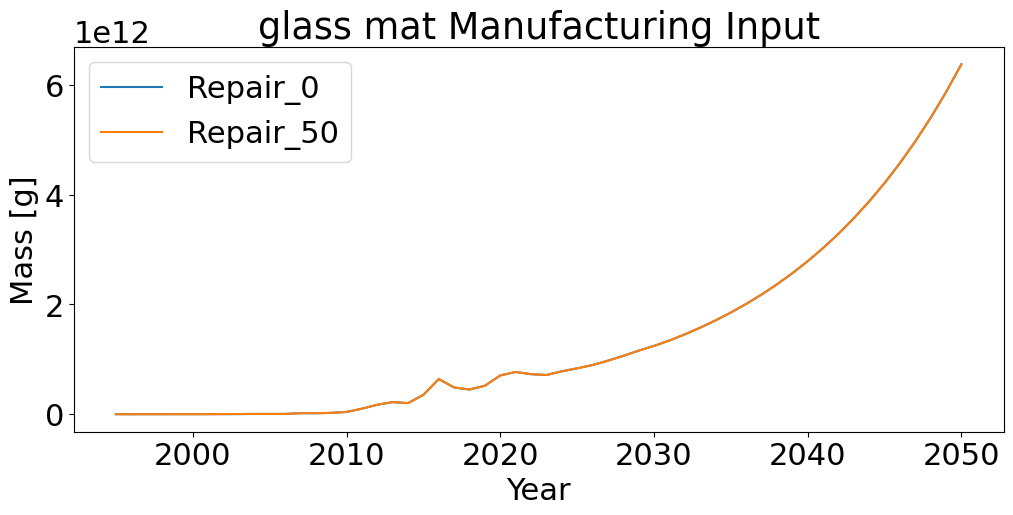

In [14]:
r1.plotMaterialComparisonAcrossScenarios(keyword='mat_Manufacturing_Input', material='glass')

# clean after this

In [ ]:
AREA = r1.scenario['Repair_0'].data['Area'].iloc[0]

In [ ]:
filter_col = [col for col in r1.scenario['Repair_0'].data if col.startswith('EOL_on_Year_')]


In [ ]:
Cumul_EOL_R0 = []
Cumul_EOL_R50 = []

foo=0
foo2=0
for life in range (0, len(filter_col)):
    foo +=  r1.scenario['Repair_0'].data[filter_col[life]].iloc[0]
    foo2 += r1.scenario['Repair_50'].data[filter_col[life]].iloc[0]
    Cumul_EOL_R0.append(foo)
    Cumul_EOL_R50.append(foo2)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(AREA-Cumul_EOL_R0, label='Repair = 0%')
plt.plot(AREA-Cumul_EOL_R50, label='Repair = 0%')
plt.ylabel('Working Area [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Repair effects')
plt.legend()
plt.xlim([0,45])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(AREA-Cumul_EOL_R0, label='Repair = 0%')
plt.plot(AREA-Cumul_EOL_R50, label='Repair = 0%')
ax.set_yscale('log')
plt.ylabel('Working Area [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Repair effects')
plt.legend()
plt.xlim([0,45])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(Cumul_EOL_R0)
plt.plot(Cumul_EOL_R50)
plt.ylabel('Area Disposed [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Repair effects')
plt.xlim([0,45])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(Cumul_EOL_R0)
plt.plot(Cumul_EOL_R50)
ax.set_yscale('log')
plt.ylabel('Area Disposed [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Repair effects')
plt.xlim([0,45])

In [ ]:
r1.plotScenariosComparison(keyword='Installed_Capacity_[W]')

In [ ]:
r1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')
r1.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')

## Reuse

Starting a Clean simulation

In [ ]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='Reuse_0', file=r'..\baselines\baseline_modules_US.csv')
r1.scenario['Reuse_0'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')
r1.scenario['Reuse_0'].addMaterial('silicon', file=r'..\baselines\baseline_material_silicon.csv')

r1.createScenario(name='Reuse_50', file=r'..\baselines\baseline_modules_US.csv')
r1.scenario['Reuse_50'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')
r1.scenario['Reuse_50'].addMaterial('silicon', file=r'..\baselines\baseline_material_silicon.csv')

In [ ]:
r1.scenario['Reuse_0'].data['mod_Reuse'] = 0
r1.scenario['Reuse_50'].data['mod_Reuse'] = 50
r1.scenario['Reuse_50'].data['mod_Reuse'] = 50

r1.scenario['Reuse_0'].data['mod_reliability_t50'] = 35
r1.scenario['Reuse_0'].data['mod_reliability_t90'] = 45
r1.scenario['Reuse_50'].data['mod_reliability_t50'] = 35
r1.scenario['Reuse_50'].data['mod_reliability_t90'] = 45

# Setting Project Lifetime beyond Failures
r1.scenario['Reuse_0'].data['mod_lifetime'] = 25
r1.scenario['Reuse_50'].data['mod_lifetime'] = 25

In [ ]:
r1.calculateMassFlow()

In [ ]:
r1.scenario['Reuse_50'].data.keys()

In [ ]:
AREA = r1.scenario['Reuse_50'].data['Area'].iloc[0]

In [ ]:
filter_col = [col for col in r1.scenario['Reuse_50'].data if col.startswith('EOL_on_Year_')]

In [ ]:
Cumul_EOL_R0 = []
Cumul_EOL_R50 = []

foo=0
foo2=0
for life in range (0, len(filter_col)):
    foo +=  r1.scenario['Reuse_0'].data[filter_col[life]].iloc[0]
    foo2 += r1.scenario['Reuse_50'].data[filter_col[life]].iloc[0]
    Cumul_EOL_R0.append(foo)
    Cumul_EOL_R50.append(foo2)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(AREA-Cumul_EOL_R0, label='Reuse = 0%')
#plt.plot(AREA-Cumul_EOL_R50, label='Reuse = 50%')
plt.ylabel('Working Area [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Reuse at End of Project Lifetime')
plt.legend()
plt.xlim([0,45])


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(AREA-Cumul_EOL_R0, label='Reuse = 0%')
plt.plot(AREA-Cumul_EOL_R50, label='Reuse = 50%')
plt.ylabel('Working Area [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Reuse at End of Project Lifetime')
plt.legend()
plt.xlim([0,45])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(AREA-Cumul_EOL_R0, label='Reuse = 0%')
plt.plot(AREA-Cumul_EOL_R50, label='Reuse = 50%')
plt.legend()
ax.set_yscale('log')
plt.ylabel('Working Area [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Reuse at End of Project Lifetime')
plt.xlim([0,45])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(Cumul_EOL_R0, label='Reuse = 0%')
plt.plot(Cumul_EOL_R50, label='Reuse = 50%')
plt.ylabel('Area Disposed [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Reuse at End of Project Lifetime')
plt.legend()
plt.xlim([0,45])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(Cumul_EOL_R0, label='Reuse = 0%')
plt.plot(Cumul_EOL_R50, label='Reuse = 50%')
ax.set_yscale('log')
plt.ylabel('Area Disposed [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Reuse at End of Project Lifetime')
plt.legend()
plt.xlim([0,45])

In [ ]:
r1.plotScenariosComparison(keyword='Installed_Capacity_[W]')

In [ ]:
r1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')
r1.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')